# 3-1 데이터 불러오기

In [1]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
# entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


# 3-2 데이터 분석하기
## 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.) 

In [7]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

In [8]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [9]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data.결제금액.str.replace(',', '')
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [10]:
# salse_data의 결제금액을 숫자형태로 바꾸기
sales_data['결제금액'] = sales_data.결제금액.astype('int64')

In [11]:
# temp_var의 payment열을 date 기준으로 집계하기
grouped = temp_var['결제금액'].groupby(temp_var['date']).count()
grouped

date
2021-02     18
2021-03    529
2021-04    910
2021-05    658
2021-06    920
2021-07    313
2021-08    293
2021-09    301
2021-10    557
2021-11    679
2021-12    841
2022-01    377
2022-02    282
2022-03    415
2022-04     12
Name: 결제금액, dtype: int64

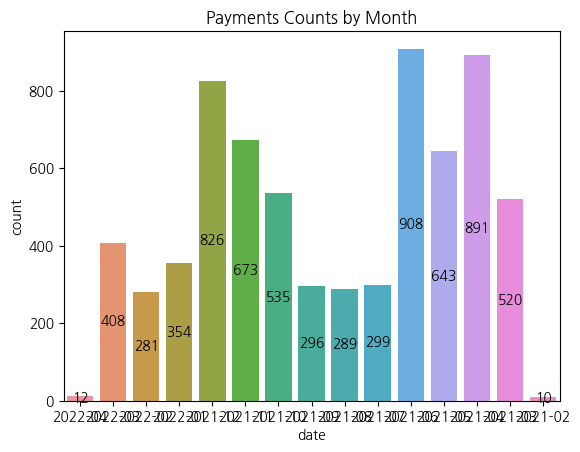

In [21]:
# 집계 결과를 시각화하기
ax = sns.countplot(data = temp_var['결제금액'], x = temp_var['date'])
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type = 'center')
plt.title('Payments Counts by Month')
plt.show()

## 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.) 

In [13]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
canceled = temp_var[temp_var['판매수량']==-1].index
temp_var.drop(canceled, inplace=True)
product_count = pd.value_counts(temp_var['상품명'].values, sort=True)
product_count

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Length: 100, dtype: int64

In [14]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
product_count = pd.DataFrame(product_count).reset_index()
product_count = product_count.rename(columns={'index': '상품명', 0:'판매수량'}).head(10)
product_count

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [15]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


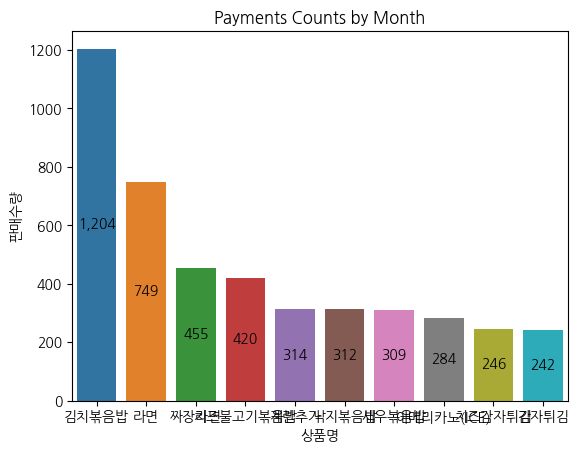

In [16]:
# 집계 결과를 시각화하기
ax = sns.barplot(data = product_count, x = product_count['상품명'], y = product_count['판매수량'])
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type = 'center')
plt.title('Payments Counts by Month')
plt.show()

In [17]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
item_payment = temp_var['결제금액'].groupby(temp_var['상품명']).sum()
item_payment = pd.DataFrame(item_payment)

In [18]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
item_payment = item_payment.sort_values('결제금액', ascending = False).reset_index().head(10)
item_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


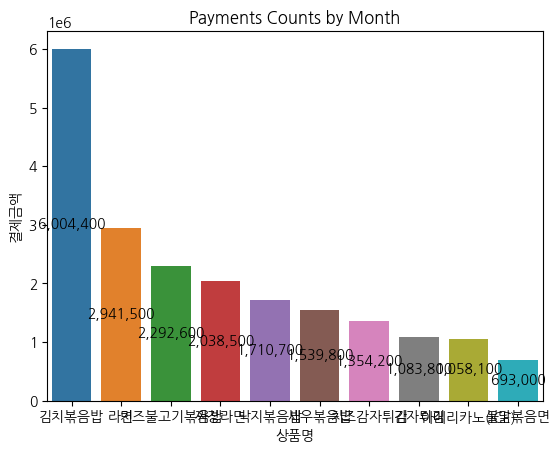

In [23]:
# 집계 결과 시각화하기
ax = sns.barplot(data = item_payment, x = item_payment['상품명'], y = item_payment['결제금액'])
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type = 'center')
plt.title('Payments Counts by Month')
plt.show()

## 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.) 

In [24]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [25]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var.금액.astype('int64')

In [26]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [27]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = pd.DataFrame(tickets).sort_values(by = '금액', ascending = False).reset_index().head(10)
tickets

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


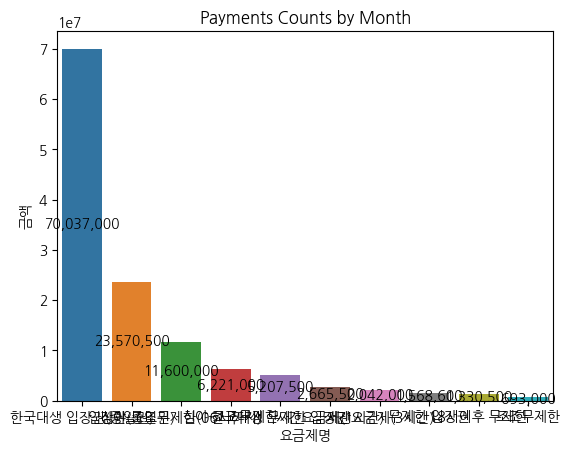

In [28]:
# 집계 결과 시각화하기
ax = sns.barplot(data = tickets, x = tickets['요금제명'], y = tickets['금액'])
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type = 'center')
plt.title('Payments Counts by Month')
plt.show()